<h1 align="center"><b>Homework Assignment 3 (100 points total)</b></h1>
<h3 align="center"><b>Assigned at the start of Module 9</b></h3>
<h3 align="center"><b>Due at the end of Module 12</b></h3><br>


# Q1: Supervised Learning Regression

## Build a supervised learning linear regression model (scikit-learn permitted) (30 points total)

In this question, you will analyze a housing dataset and investigate the impact of multicollinearity on a Linear Regression model. You will then apply Ridge and Lasso Regression to mitigate these effects and compare their performance.

---

### **1. Data Acquisition & Preprocessing (5 points)**
- **Dataset** Use the California Housing Dataset (available via `sklearn.datasets`).
- **Exploratory Data Analysis (EDA):**
    - Identify and describe the feature distributions.
    - Check for multicollinearity using a correlation heatmap and Variance Inflation Factor (VIF).
    - Select a subset of features that introduce multicollinearity.
- **Preprocessing**:
    - Standardize the dataset to ensure consistent scaling.
    - Split the data into training (80%) and testing (20%) sets.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


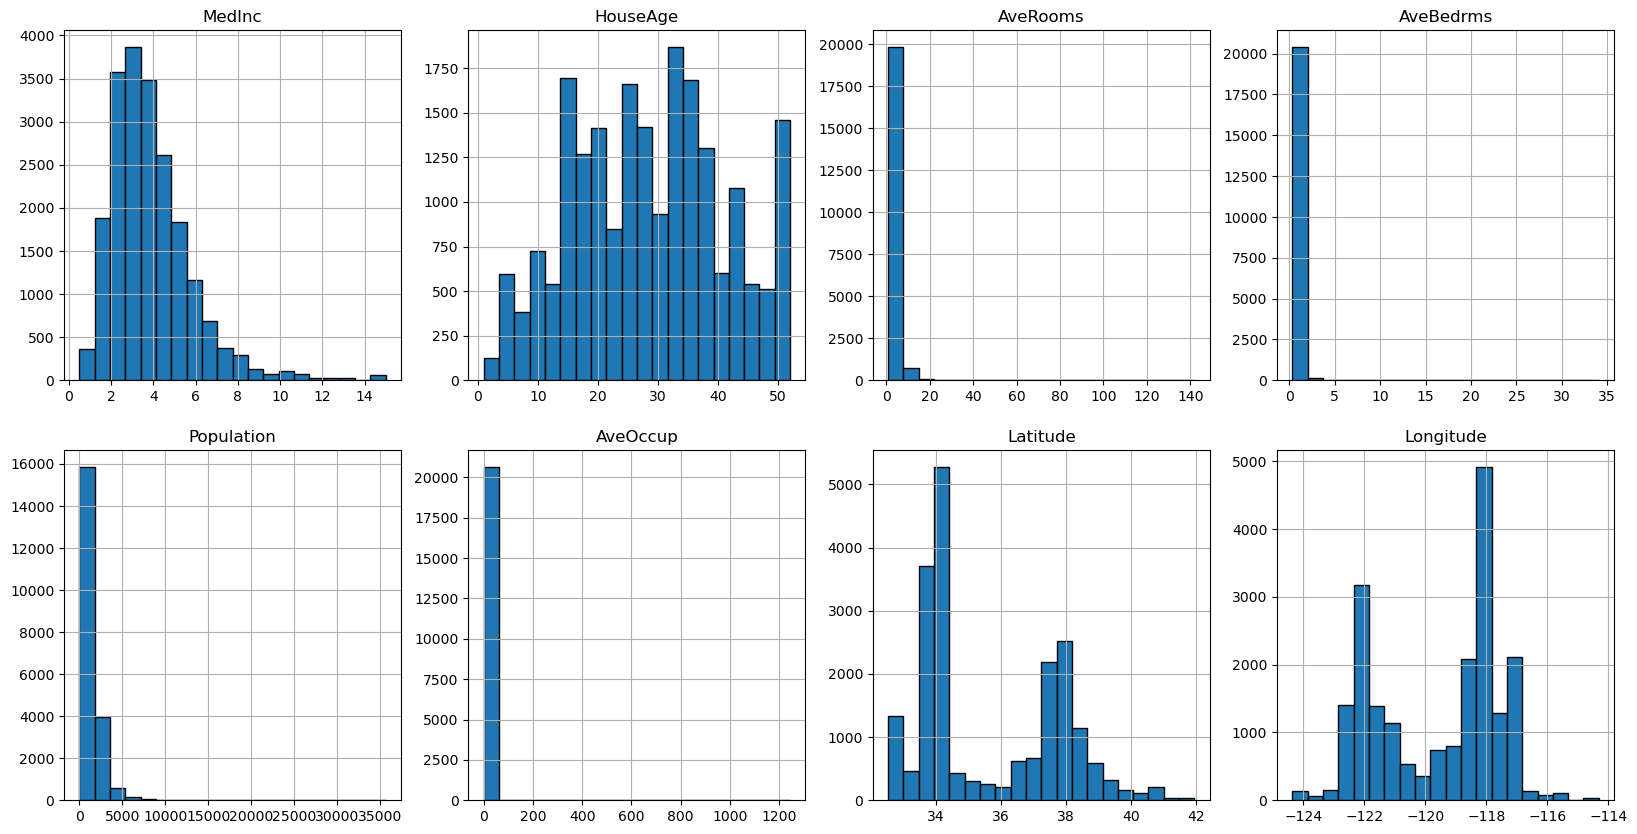

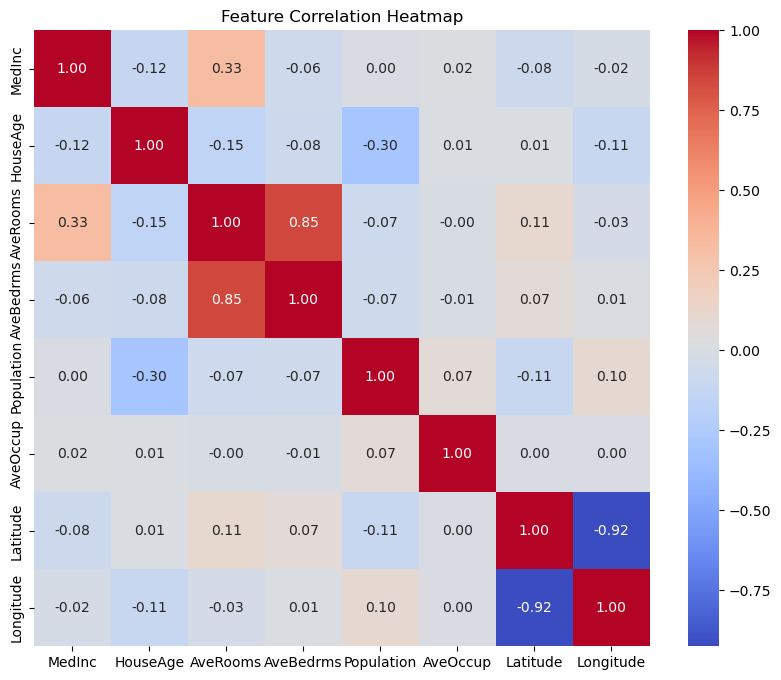

,Feature,VIF
0,MedInc,2.501295
1,HouseAge,1.241254
2,AveRooms,8.342786
3,AveBedrms,6.994995
4,Population,1.138125
5,AveOccup,1.008324
6,Latitude,9.297624
7,Longitude,8.962263


In [51]:
# Calfiornia Housing Dataset 
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

housing_data = fetch_california_housing()
housing_df = pd.DataFrame(housing_data['data'], columns=housing_data['feature_names'])
housing_df[housing_data['target_names'][0]] = housing_data['target']

# --- Exploratory Data Analysis ---
# Descriptive statistics and feature distributions 
display(housing_df.describe())

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
for i, column in enumerate(housing_df.columns):
    if i < len(axes): 
        housing_df[column].hist(ax=axes[i], bins=20, edgecolor='black')
        axes[i].set_title(f'{column}')

# Correlation Heatmap 
target = housing_df['MedHouseVal']
features = housing_df.drop(columns='MedHouseVal')
corr_matrix = features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# VIF
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = features_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(features_scaled.values, i) for i in range(features_scaled.shape[1])]
display(vif_data)

# --- Preprocessing ---
# Standardized data above
# Split into train and test sets 
x_train, x_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


Multicollinearity: Rule of thumb, corr > |0.08| indicates multicollinearity. Latitude and Longitude indicate multicollinearity, AveRooms and AveBedrms do as well. 

VIF = 1 (no multicollinearity) 
VIF > 5 (some)
VIF > 10 (high, consider removing the feature)

---
### 2. **Regression Model Development (10 points)**
- **Train a Linear Regression Model:**
    - Fit a standard Linear Regression model to the data.
    - Report the coefficients and explain their significance.
    - Evaluate the model using MSE, RMSE, and $R^2$.
- **Detect Multicollinearity Issues:**
    - Identify unstable coefficients or unusually large magnitudes in the model.
    - Explain how multicollinearity affects interpretation.

In [53]:
# --- Train Linear Regression Model --- 
# Fit standard LR model to the data 
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression()
model.fit(x_train, y_train)

# Report coefficients 
print('Model Coefficients and Intercept:')
coefficients = pd.DataFrame({
    'Feature': features_scaled.columns,
    'Coefficient': model.coef_
})
display(coefficients)
intercept = print(f"Intercept: {model.intercept_:.4f}\n")

# Evaluate model with MSE, RMSE, and R2
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

# --- Detect Multicollinearity Issues --- 
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
unstable_coeffs = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
display(unstable_coeffs)

display(vif_data)
x = vif_data.merge(coefficients, on='Feature')
x

# vif_data = vif_data.merge(coefficients, on='Feature')
# print(vif_data.sort_values(by='VIF', ascending=False))


Model Coefficients and Intercept:


,Feature,Coefficient
0,MedInc,0.852382
1,HouseAge,0.122382
2,AveRooms,-0.305116
3,AveBedrms,0.371132
4,Population,-0.002298
5,AveOccup,-0.036624
6,Latitude,-0.896635
7,Longitude,-0.868927


Intercept: 2.0679

Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
R-squared (R^2): 0.5758


,Feature,Coefficient,Abs_Coefficient
6,Latitude,-0.896635,0.896635
7,Longitude,-0.868927,0.868927
0,MedInc,0.852382,0.852382
3,AveBedrms,0.371132,0.371132
2,AveRooms,-0.305116,0.305116
1,HouseAge,0.122382,0.122382
5,AveOccup,-0.036624,0.036624
4,Population,-0.002298,0.002298


,Feature,VIF
0,MedInc,2.501295
1,HouseAge,1.241254
2,AveRooms,8.342786
3,AveBedrms,6.994995
4,Population,1.138125
5,AveOccup,1.008324
6,Latitude,9.297624
7,Longitude,8.962263


,Feature,VIF,Coefficient,Abs_Coefficient
0,MedInc,2.501295,0.852382,0.852382
1,HouseAge,1.241254,0.122382,0.122382
2,AveRooms,8.342786,-0.305116,0.305116
3,AveBedrms,6.994995,0.371132,0.371132
4,Population,1.138125,-0.002298,0.002298
5,AveOccup,1.008324,-0.036624,0.036624
6,Latitude,9.297624,-0.896635,0.896635
7,Longitude,8.962263,-0.868927,0.868927


---

### **3. Regularization Techniques: Ridge vs. Lasso (10 points)**
- **Apply Ridge Regression (L2 Regularization):**
    - Train a Ridge model with various values of $\lambda$(e.g., 0.1, 1, 10, 100).
    - Plot coefficient shrinkage as $\lambda$ increases.
    - Evaluate model performance using MSE, RMSE, and $R^2$.
- **Apply Lasso Regression (L1 Regularization):**
    - Train a Lasso model with the same $\lambda$ values.
    - Plot coefficient shrinkage and identify features that are eliminated.
    - Compare its performance to Ridge Regression.



---
### **4. Interpretation & Discussion (5 points)**
- **Compare and interpret results:**
    - How did Ridge and Lasso handle multicollinearity?
    - Which model had better predictive accuracy?
    - When would you use Ridge over Lasso (and vice versa)?
- **Discuss implications for real-world regression problems:**
    - If a model has too many irrelevant features, which method (Ridge or Lasso) would be more effective?
    - How does regularization impact overfitting in high-dimensional datasets?

# Q2: Supervised Learning Classification  
## Breast Cancer Prediction Using Feature Engineering & SVM (40 points total)

In this question, you will build a classifier to predict the diagnosis of breast cancer (malignant vs. benign) using structured diagnostic data. You will preprocess features, engineer new ones, and evaluate multiple classification models, with a focus on implementing Support Vector Machines (SVMs) from scratch using quadratic programming.

---

## 1. Data Acquisition & Preprocessing (5 points)

- **Dataset**: Use the [Breast Cancer Wisconsin (Diagnostic) Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) (also available via `sklearn.datasets.load_breast_cancer()`).

### Exploratory Data Analysis (EDA):
- Examine the distribution of the target variable (`diagnosis`: M = malignant, B = benign).
- Identify any missing or anomalous values.
- Explore relationships between features such as:
  - `mean radius`
  - `mean texture`
  - `mean smoothness`

### Feature Engineering:
- Encode the target variable (`diagnosis`) into binary:
  - `1 = malignant`, `0 = benign`
- Normalize continuous features using `StandardScaler` or `MinMaxScaler` (especially important for SVM).
- Create interaction terms or polynomial features (e.g., `mean radius × mean texture`, `mean concavity²`) using `PolynomialFeatures` from `sklearn.preprocessing`.

---

## 2. Model Training & Evaluation (20 points)

Train the following classifiers:

- **Logistic Regression** (baseline; use `scikit-learn`)
- **Decision Tree Classifier** (interpretable; use `scikit-learn`)
- **Support Vector Machine (SVM)**:
  - Implement from scratch using the `cvxopt` quadratic programming solver
  - Do **not** use `scikit-learn`'s `SVC` or `LinearSVC`

### Evaluation Metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- Confusion Matrix
- ROC-AUC Curve

Use appropriate plots to visualize performance (e.g., confusion matrix heatmap, ROC curves).

---

## 3. Hyperparameter Tuning (10 points)

### Hyperparameter Tuning:
- **Logistic Regression**: Tune regularization parameter `C`
- **Decision Tree**: Tune `max_depth` and optionally `min_samples_leaf`
- **SVM**: Try both linear and RBF kernels (implement both kernels)
  - Linear Kernel - $K(x,x') = x^T x' $
  - RBF kernel - $K(x,x') = \exp(-\gamma || x - x' ||^2)$
    - where $\gamma > 0$ is a parameter that defines the spread of the kernel

---

## 4. Interpretation & Discussion (5 points)

### Model Comparison:
- Which model performed best overall?
- Which model showed the most stability (i.e., smallest performance variance across folds)?
- How did kernel choice in SVM influence classification performance?
- Did feature scaling or polynomial features help the SVM?

### Real-World Implications:
- What are the consequences of **false negatives** in this breast cancer prediction task?
- In a medical diagnosis context, would you prioritize **precision** or **recall**? Why?
- Is your SVM implementation viable for use in clinical decision-making tools? What improvements would be necessary?

---

## Submission Guidelines:
- Submit a Jupyter notebook (or `.py` script) with all code and plots
- Include a brief summary of findings at the end of the notebook
- Code should be clearly commented and structured

---

## Optional Extensions:
- Implement grid search manually for SVM kernel and `C` tuning
- Use SHAP or LIME for post hoc model explanation (especially for the logistic model)


# **Q3: Custom K-Means Clustering Framework**

## Build a custom K-Means clustering framework from scratch (scikit-learn not permitted) (30 points total)

In this question, you will implement the K-Means clustering algorithm from scratch and develop a framework that evaluates multiple candidate numbers of clusters. You will apply your framework to the **Wholesale Customers Dataset** from the UCI Machine Learning Repository, which is well-suited for clustering-based customer segmentation. **Note:** For the clustering analysis, you should drop the **Channel** and **Region** columns, focusing solely on the spending features. Additionally, you will analyze the runtime of your algorithm and provide an asymptotic complexity analysis.

---

### **1. Data Acquisition & Preprocessing (5 points)**
- **Dataset:** Download the **Wholesale Customers Dataset** from the UCI Machine Learning Repository.
- **Exploratory Data Analysis (EDA):**
  - Identify missing or inconsistent values.
  - Analyze the distributions of features.
  - Apply normalization or standardization if necessary to ensure the data is suitable for clustering.
  - **Important:** Remove the **Channel** and **Region** columns before performing clustering analysis.

---

### **2. Problem Formulation & Algorithm Design (10 points)**
- **Objective:** Clearly define the goal of clustering in the context of customer segmentation using the Wholesale Customers dataset.
- **Algorithm Overview:**
  - Provide a brief explanation of the K-Means clustering algorithm, detailing its main steps:
    - **Initialization:** Selecting initial centroids.
    - **Assignment:** Allocating data points to the nearest centroid.
    - **Update:** Recalculating centroids based on the current cluster members.
- **Framework Requirements:**
  - Develop a framework that accepts a list of candidate numbers of clusters (e.g., [2, 3, 4, 5, 6]).
  - For each candidate value, run your custom K-Means algorithm.
  - Compute clustering metrics (such as Within-Cluster Sum of Squares (WCSS) and silhouette score—metrics introduced in lecture) for each clustering result.
  - Select and justify the best number of clusters based on your computed metrics.
- **Considerations:**
  - Discuss any assumptions you make (e.g., initialization methods, convergence criteria).
  - Identify potential challenges in applying K-Means to this dataset.

---

### **3. Implementation & Runtime Analysis (10 points)**
- **Implementation:**
  - Write your own implementation of the K-Means algorithm in Python without using any built-in clustering libraries.
  - Integrate the algorithm into a framework that automates the process for multiple candidate numbers of clusters.
- **Runtime Analysis:**
  - Measure and report the total runtime of your algorithm for different candidate values.
  - Analyze the computational complexity of your implementation. Provide the asymptotic notation (e.g., O(n × k × i)), where:
    - *n* is the number of data points,
    - *k* is the number of clusters,
    - *i* is the number of iterations until convergence.
- **Documentation:**
  - Ensure your code is well-documented, with comments explaining the functionality of key components.

---

### **4. Evaluation & Reflection (5 points)**
- **Result Comparison:**
  - Compare the clustering results obtained for each candidate number of clusters using your chosen metrics.
  - Identify which number of clusters produced the best overall performance.
- **Discussion:**
  - Analyze how the resultant clusters relate back to the physical world. For example, interpret the clusters in terms of customer segmentation by exploring patterns such as purchasing behavior, spending habits, or other relevant characteristics.
  - Discuss what the cluster profiles might imply for real-world applications, such as targeted marketing strategies or business decision-making.
  - Reflect on the trade-offs between clustering quality and runtime performance.

---

This question is designed to deepen your understanding of unsupervised learning, algorithm development, and performance evaluation. Be sure to clearly justify your design choices and critically analyze your results throughout the report.
